In [1]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential 
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense
from keras.models import load_model



In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train,Y_train),(X_test,Y_test)=keras.datasets.mnist.load_data()

In [4]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [5]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
X_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
Y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [8]:
Y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [26]:
# Get the unique labels and their counts
unique_labels, counts = np.unique(Y_train, return_counts=True)

# Print the unique labels and their counts
print("Unique labels in Y_train:", unique_labels)
print("Counts of each label in Y_train:", counts)

# Print the total number of labels
total_labels = len(Y_train)
print("Total number of labels in Y_train:", total_labels)

Unique labels in Y_train: [0 1 2 3 4 5 6 7 8 9]
Counts of each label in Y_train: [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]
Total number of labels in Y_train: 60000


Show the images with bach size 25 and number of bachers is 10

In [ ]:
# Function to plot a batch of images
def plot_image_batch(X_data, Y_data, start_index, batch_size):
    plt.figure(figsize=(10, 10))
    for i in range(batch_size):
        index = start_index + i
        if index >= len(X_data):
            break
        plt.subplot(5, 5, i + 1)
        plt.imshow(X_data[index], cmap='gray')
        plt.title(f"Label: {Y_data[index]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Specify batch size and number of batches to display
batch_size = 25
num_batches = 10

# Display batches of images
for batch in range(num_batches):
    start_index = batch * batch_size
    plot_image_batch(X_train, Y_train, start_index, batch_size)

Save all the image in the folder all 60000 images

In [28]:
import os
from PIL import Image

# Define the directory path to save images
save_dir = "C:\\Users\\Muhammad Ihtesham\\Desktop\\Windows sa pahela\\Gray scal Images\\Code In Python About The Reasearch paper\\Keras\\Xtrain_Images_of_MNIST"
os.makedirs(save_dir, exist_ok=True)

# Save each image in the directory
for i, image in enumerate(X_train):
    img = Image.fromarray(image)
    label = Y_train[i]
    img.save(os.path.join(save_dir, f"image_{i}_label_{label}.png"))

print(f"Saved {len(X_train)} images to '{save_dir}' directory.")


Saved 60000 images to 'C:\Users\Muhammad Ihtesham\Desktop\Windows sa pahela\Gray scal Images\Code In Python About The Reasearch paper\Keras\Xtrain_Images_of_MNIST' directory.


Store all the images with label folders Like 1 is store in label folder 1 and so on

In [29]:
import os
from PIL import Image


# Define the base directory to save images
base_dir = "C:\\Users\\Muhammad Ihtesham\\Desktop\\Windows sa pahela\\Gray scal Images\\Code In Python About The Reasearch paper\\Keras\\Label Data of MNIST"
os.makedirs(base_dir, exist_ok=True)

# Save each image in the respective label directory
for i, image in enumerate(X_train):
    label = Y_train[i]
    label_dir = os.path.join(base_dir, str(label))
    os.makedirs(label_dir, exist_ok=True)
    img = Image.fromarray(image)
    img.save(os.path.join(label_dir, f"image_{i}.png"))

print(f"Saved {len(X_train)} images to '{base_dir}' directory, organized by label.")


Saved 60000 images to 'C:\Users\Muhammad Ihtesham\Desktop\Windows sa pahela\Gray scal Images\Code In Python About The Reasearch paper\Keras\Label Data of MNIST' directory, organized by label.


Convert The pixel values in Image and check what is in the image of in the array of index[0]

Text(0.5, 1.0, 'This image is 5')

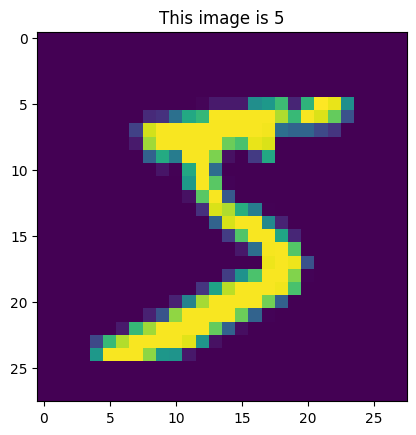

In [19]:
plt.imshow(X_train[0])
plt.title(f"This image is {Y_train[0]}")
#plt.xlabel(f"This image is {Y_train[0]}")

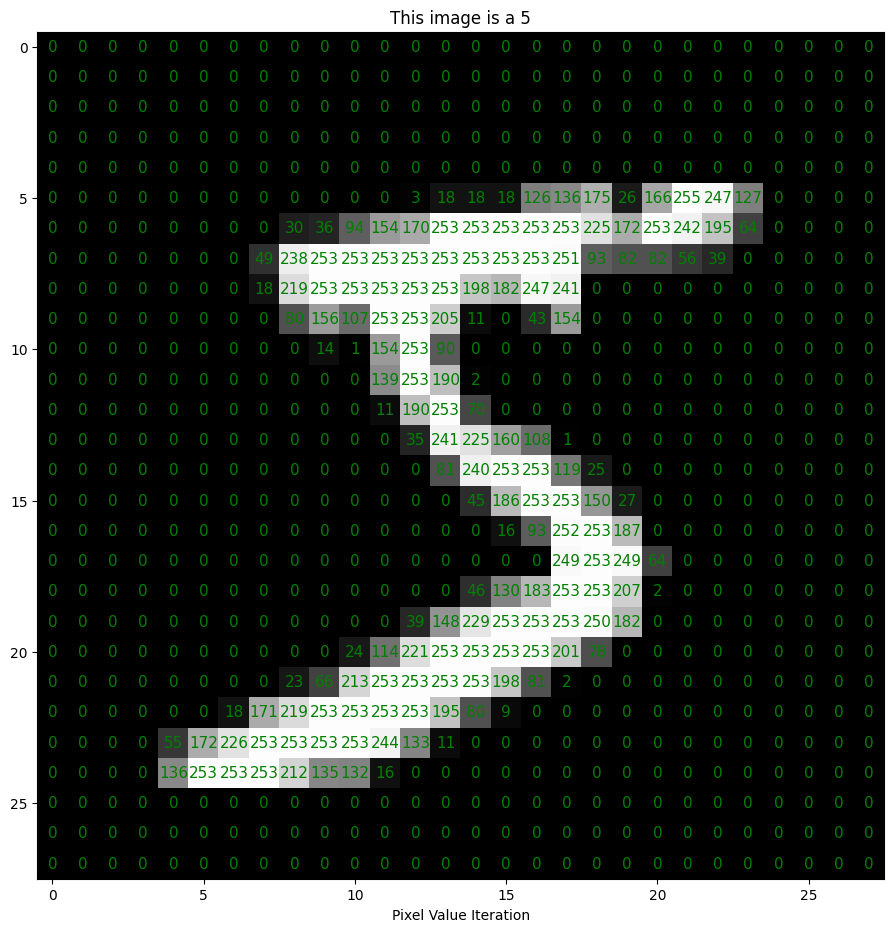

In [31]:
image = X_train[0]
label = Y_train[0]
# Plot the image
plt.figure(figsize=(11, 11))
plt.imshow(image, cmap='gray')
plt.title(f"This image is a {label}")
plt.xlabel("Pixel Value Iteration")

# Annotate each pixel value
rows, cols = image.shape
for i in range(rows):
    for j in range(cols):
        plt.text(j, i, image[i, j], ha='center', va='center', color='green', fontsize=11)

# Display the plot
plt.show()

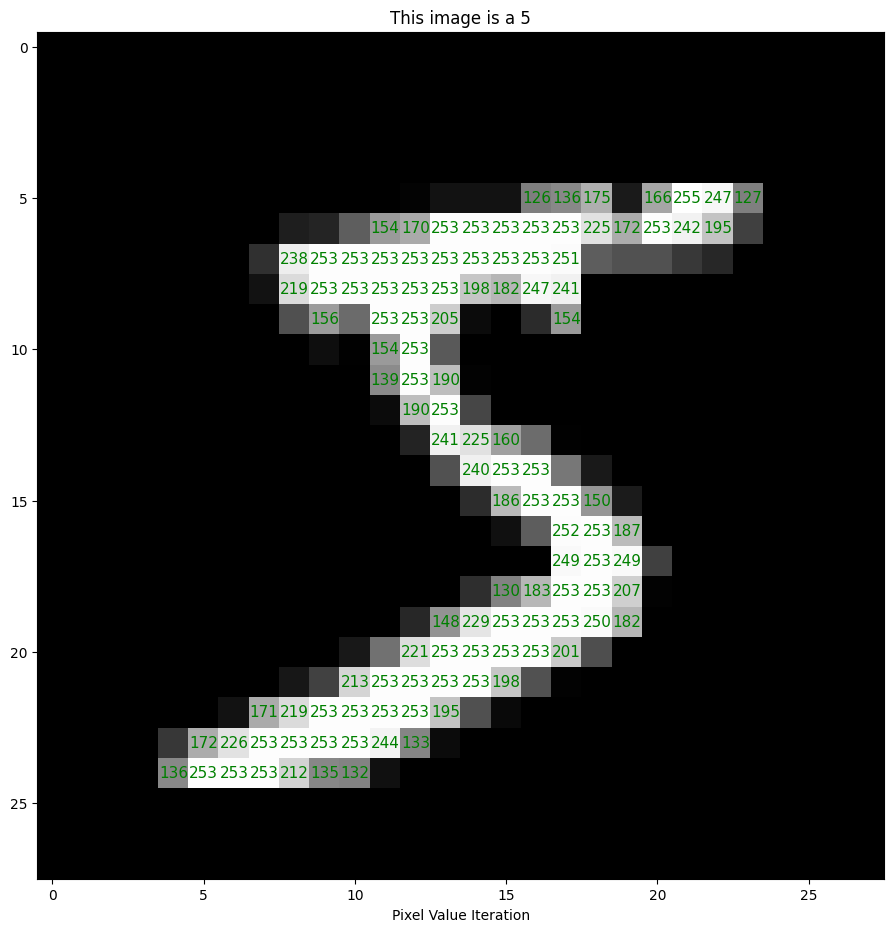

In [32]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load the dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Select the first image and its label
image = X_train[0]
label = Y_train[0]

# Plot the image
plt.figure(figsize=(11, 11))
plt.imshow(image, cmap='gray')
plt.title(f"This image is a {label}")
plt.xlabel("Pixel Value Iteration")

# Annotate each pixel value if greater than 120
rows, cols = image.shape
for i in range(rows):
    for j in range(cols):
        if image[i, j] > 120:
            plt.text(j, i, image[i, j], ha='center', va='center', color='green', fontsize=11)

# Display the plot
plt.show()


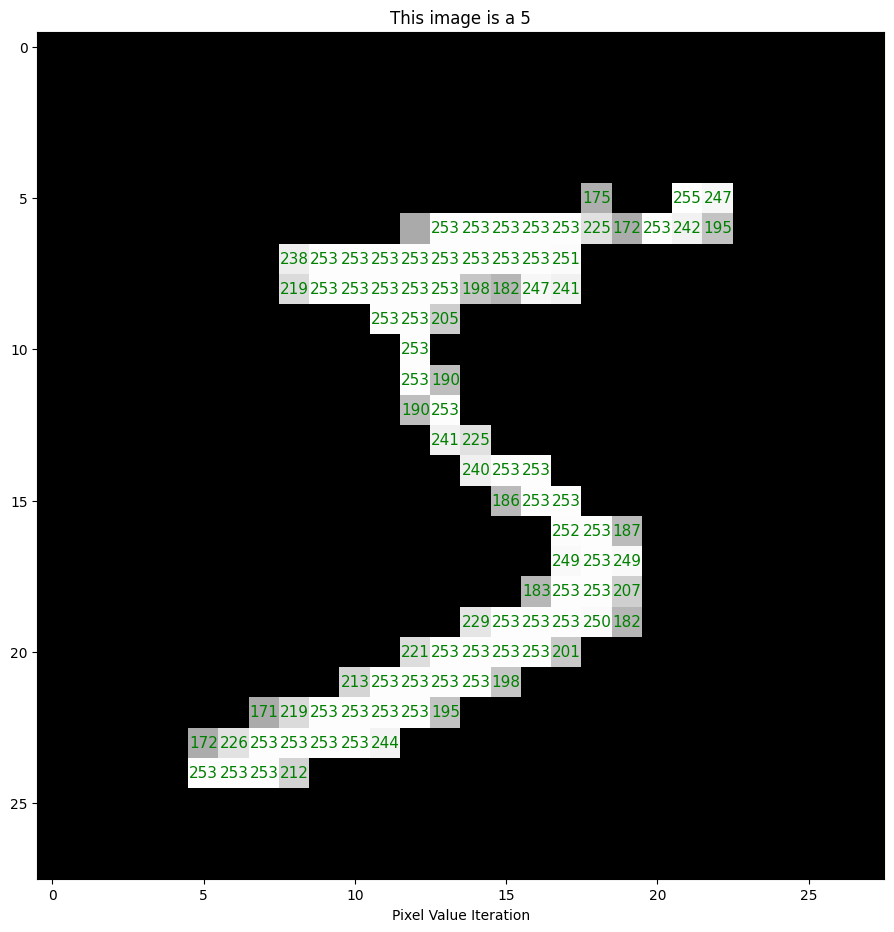

In [38]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import numpy as np

# Load the dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Select the first image and its label
image = X_train[0]
label = Y_train[0]

# Create a copy of the image and set pixels with values less than 120 to 0
processed_image = np.where(image < 170, 0, image)

# Plot the processed image
plt.figure(figsize=(11, 11))
plt.imshow(processed_image, cmap='gray')
plt.title(f"This image is a {label}")
plt.xlabel("Pixel Value Iteration")

# Annotate each pixel value if greater than 120
rows, cols = image.shape
for i in range(rows):
    for j in range(cols):
        if image[i, j] > 170:
            plt.text(j, i, image[i, j], ha='center', va='center', color='green', fontsize=11)

# Display the plot
plt.show()


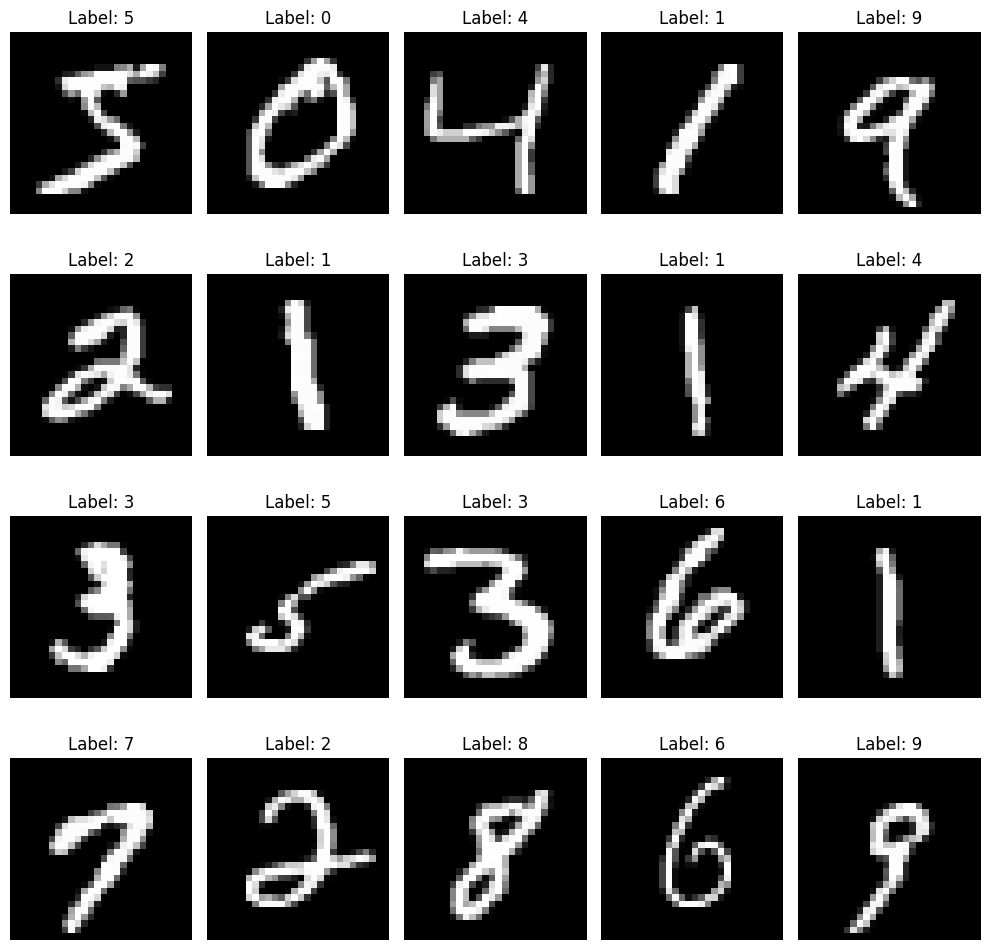

In [22]:
# Specify the number of images to display
num_images = 20

# Create a figure with subplots
fig, axes = plt.subplots(4, 5, figsize=(10, 10))

# Flatten axes array for easy iteration
axes = axes.flatten()

for i in range(num_images):
    # Select the image and label
    image = X_train[i]
    label = Y_train[i]
    
    # Plot the image
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f"Label: {label}")
    axes[i].axis('off')  # Hide axes ticks

# Adjust layout
plt.tight_layout()
plt.show()